# Modelación Supervisada

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importar Tabal de Datos Limpia y Reducida

In [2]:
data = pd.read_csv('real_estate.csv') 

## Estructura de Datos

In [3]:
data.head()

,d_created_on,c_lat,c_lon,c_price,c_surface_covered_in_m2,v_estado,v_anio_2015,v_anio_2016,v_mes_2,v_mes_3,...,descr_comedor,descr_id,descr_nocnok,descr_recamaras,descr_sala,descr_sistema,v_region_norte,v_region_sur,v_tamanio_grande,v_tamanio_mediano
0,2014-01-02,19.497295,-96.879250,750000.0,90.0,Veracruz de Ignacio de la Llave,0,0,0,0,...,1,0,0,2,1,0,0,0,0,1
1,2014-01-02,19.200068,-96.170279,140000.0,174.5,Veracruz de Ignacio de la Llave,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2014-01-02,19.497295,-96.879250,440000.0,60.0,Veracruz de Ignacio de la Llave,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3,2014-01-02,19.497295,-96.879250,2950000.0,177.0,Veracruz de Ignacio de la Llave,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,2014-01-02,19.497295,-96.879250,750000.0,70.0,Veracruz de Ignacio de la Llave,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


## Enriquecimiento de Tabla

In [4]:
estados = list(data['v_estado'].value_counts().index.sort_values())

In [5]:
# datos de superficie por inegi
superficie = [5616,
71450,
73909,
57507,
73311,
247455,
151562,
5627,
1495,
123317,
22351,
30608,
63596,
20813,
78588,
58599,
4879,
27857,
64156,
93757,
34306,
11699,
44705,
61137,
58200,
179355,
24731,
80249,
4016,
71826,
39524,
75284]
# diccionario de superficie
sup_estado = dict(zip(estados, superficie))

In [6]:
# Población
poblacion = [1312544,
3315766,
712029,
899931,
5217908,
3556574,
2954915,
711235,
8918653,
1754754,
16187608,
5853677,
3533251,
2858359,
7844830,
4584471,
1903811,
1181050,
5119504,
3967889,
6168883,
2038372,
1501562,
2717820,
2966321,
2850330,
2395272,
3441698,
1272847,
8112505,
2097175,
1579209]
# diccionario de población
pob_estado = dict(zip(estados, poblacion))

In [7]:
# tasa hipotecaria promedio por año datos Banxico
tasa_hipotecaria = {2013: 0.119145454545455, 2014: 0.107691666666667,
                   2015: 0.103133333333333, 2016: 0.102191666666667}

In [8]:
## nuevas variables
# población
data['c_poblacion'] = data['v_estado'].apply(lambda x: pob_estado[x])
# superficie
data['c_superficie'] = data['v_estado'].apply(lambda x: sup_estado[x])
# densidad poblacional
data['c_densidad'] = data['c_poblacion'] / data['c_superficie']
# tasa hipotecaria
data['c_tasa'] = pd.to_datetime(data['d_created_on']).apply(lambda x: tasa_hipotecaria[x.year])
# dummy estados
data = pd.get_dummies(data, columns = ['v_estado'], drop_first = True)

In [9]:
data.columns

Index(['d_created_on', 'c_lat', 'c_lon', 'c_price', 'c_surface_covered_in_m2',
       'v_anio_2015', 'v_anio_2016', 'v_mes_2', 'v_mes_3', 'v_mes_4',
       'v_mes_5', 'v_mes_6', 'v_mes_7', 'v_mes_8', 'v_mes_9', 'v_mes_10',
       'v_mes_11', 'v_mes_12', 'v_dia_semama_Jueves', 'v_dia_semama_Lunes',
       'v_dia_semama_Martes', 'v_dia_semama_Miercoles', 'v_dia_semama_Sábado',
       'v_dia_semama_Viernes', 'v_operation_sell', 'v_property_type_house',
       'v_property_type_store', 'v_conteo_geo', 'title_casa', 'title_centro',
       'title_departamento', 'title_fracc', 'title_local', 'title_lomas',
       'title_renta', 'title_residencial', 'title_san', 'title_venta',
       'descr_baao', 'descr_br', 'descr_casa', 'descr_cocina', 'descr_comedor',
       'descr_id', 'descr_nocnok', 'descr_recamaras', 'descr_sala',
       'descr_sistema', 'v_region_norte', 'v_region_sur', 'v_tamanio_grande',
       'v_tamanio_mediano', 'c_poblacion', 'c_superficie', 'c_densidad',
       'c_tasa', 'v_esta

In [10]:
columnas = ['c_lat', 'c_lon', 'c_surface_covered_in_m2',
            'c_poblacion', 'c_superficie', 'c_densidad','c_tasa', 'v_conteo_geo',
       'v_anio_2015', 'v_anio_2016', 'v_mes_2', 'v_mes_3', 'v_mes_4',
       'v_mes_5', 'v_mes_6', 'v_mes_7', 'v_mes_8', 'v_mes_9', 'v_mes_10',
       'v_mes_11', 'v_mes_12', 'v_dia_semama_Jueves', 'v_dia_semama_Lunes',
       'v_dia_semama_Martes', 'v_dia_semama_Miercoles', 'v_dia_semama_Sábado',
       'v_dia_semama_Viernes', 'v_operation_sell', 'v_property_type_house',
       'v_property_type_store', 'title_casa', 'title_centro',
       'title_departamento', 'title_fracc', 'title_local', 'title_lomas',
       'title_renta', 'title_residencial', 'title_san', 'title_venta',
       'descr_baao', 'descr_br', 'descr_casa', 'descr_cocina', 'descr_comedor',
       'descr_id', 'descr_nocnok', 'descr_recamaras', 'descr_sala',
       'descr_sistema', 'v_region_norte', 'v_region_sur', 'v_tamanio_grande',
       'v_tamanio_mediano', 'v_estado_Baja California', 'v_estado_Baja California Sur',
       'v_estado_Campeche', 'v_estado_Chiapas', 'v_estado_Chihuahua',
       'v_estado_Coahuila de Zaragoza', 'v_estado_Colima',
       'v_estado_Distrito Federal', 'v_estado_Durango',
       'v_estado_Estado de MÃ©xico', 'v_estado_Guanajuato',
       'v_estado_Guerrero', 'v_estado_Hidalgo', 'v_estado_Jalisco',
       'v_estado_Morelos', 'v_estado_Nayarit', 'v_estado_Nuevo LeÃ³n',
       'v_estado_Oaxaca', 'v_estado_Puebla', 'v_estado_QuerÃ©taro',
       'v_estado_Quintana Roo', 'v_estado_San Luis PotosÃ­',
       'v_estado_Sinaloa', 'v_estado_Sonora', 'v_estado_Tabasco',
       'v_estado_Tamaulipas', 'v_estado_Tlaxcala',
       'v_estado_Veracruz de Ignacio de la Llave', 'v_estado_YucatÃ¡n',
       'v_estado_Zacatecas']

In [11]:
# información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125684 entries, 0 to 125683
Data columns (total 86 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   d_created_on                              125684 non-null  object 
 1   c_lat                                     125684 non-null  float64
 2   c_lon                                     125684 non-null  float64
 3   c_price                                   125684 non-null  float64
 4   c_surface_covered_in_m2                   125684 non-null  float64
 5   v_anio_2015                               125684 non-null  int64  
 6   v_anio_2016                               125684 non-null  int64  
 7   v_mes_2                                   125684 non-null  int64  
 8   v_mes_3                                   125684 non-null  int64  
 9   v_mes_4                                   125684 non-null  int64  
 10  v_mes_5             

## División Cojunto de Datos

In [12]:
X = data.loc[:, columnas]
y = data.loc[:, 'c_price']

## y reshape
y = np.array(y).reshape(-1, 1)

In [13]:
## train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [15]:
X_train.head()

,c_lat,c_lon,c_surface_covered_in_m2,c_poblacion,c_superficie,c_densidad,c_tasa,v_conteo_geo,v_anio_2015,v_anio_2016,...,v_estado_Quintana Roo,v_estado_San Luis PotosÃ­,v_estado_Sinaloa,v_estado_Sonora,v_estado_Tabasco,v_estado_Tamaulipas,v_estado_Tlaxcala,v_estado_Veracruz de Ignacio de la Llave,v_estado_YucatÃ¡n,v_estado_Zacatecas
0,19.417923,-99.148384,63.0,8918653,1495,5965.654181,0.102192,34.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,18.967873,-98.290262,184.0,3967889,93757,42.320989,0.102192,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,19.311177,-99.602480,120.0,16187608,22351,724.245358,0.102192,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,20.580246,-100.391907,0.0,6168883,34306,179.819361,0.102192,46.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.563862,-100.360016,340.0,6168883,34306,179.819361,0.103133,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Standar Scaler

In [16]:
X_train_feat_scal = X_train.iloc[:, 0:8]
X_test_feat_scal = X_test.iloc[:, 0:8]
col_names = X_train.iloc[:, 0:8].columns

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# X scaler
X_train_ss = ss.fit_transform(X_train_feat_scal)
X_test_ss = ss.transform(X_test_feat_scal)

In [18]:
## unión de conjunto de datos
X_train_ss = pd.DataFrame(X_train_ss, columns = col_names).join(X_train.iloc[:, 8:])
X_test_ss = pd.DataFrame(X_test_ss, columns = col_names).join(X_test.iloc[:, 8:])

## Modelación

### Métricas

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def metricas(y_true, y_pred):
    print('R2 Score: {}'.format(r2_score(y_true, y_pred)))
    print('MAE: {}'.format(mean_absolute_error(y_true, y_pred)))
    print('MSE: {}'.format(mean_squared_error(y_true, y_pred)))

### Regresión Lineal

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

### Train Score

In [21]:
y_pred_train = lr.predict(X_train_ss)
metricas(y_train, y_pred_train)

R2 Score: 0.5841014186922967
MAE: 882842.1224537226
MSE: 1569743371389.6697


### Test Score

In [22]:
y_pred = lr.predict(X_test_ss)

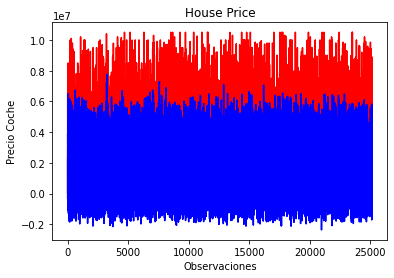

In [23]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [24]:
metricas(y_test, y_pred)

R2 Score: 0.5923586008966145
MAE: 885547.5356611644
MSE: 1584337300623.42


### Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
lr_cv_media = cross_val_score(lr, X_train_ss, y_train, cv = 4, n_jobs = -1)

In [26]:
# cross validation score
np.mean(lr_cv_media), np.std(lr_cv_media)

(0.5833714832210424, 0.002291598542248398)

### Hiperparametrización

In [27]:
# se crea el grid de variables para el modelo de regresión
param_grid_lr = {'fit_intercept': [True, False],
                'positive': [True, False]}

In [28]:
from sklearn.model_selection import GridSearchCV

# modelo
lr_cv = LinearRegression()

# Grid Search
lr_gs = GridSearchCV(lr_cv, param_grid_lr, cv=4, error_score=-1000, n_jobs=-1, scoring="r2", verbose=5)
lr_gs.fit(X_train_ss, y_train)
print("Best score: " + str(lr_gs.best_score_))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best score: 0.5833714832210424


In [29]:
lr_best = lr_gs.best_estimator_

### Train & Test Score

In [30]:
y_pred_train_best = lr_best.predict(X_train_ss)
y_pred_test_best = lr_best.predict(X_test_ss)

In [31]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841014186922967
MAE: 882842.1224537226
MSE: 1569743371389.6697

Test Score
R2 Score: 0.5923586008966145
MAE: 885547.5356611644
MSE: 1584337300623.42


## LightGBM

In [32]:
import lightgbm as lgb

In [33]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'learning_rate': 0.1,
    'num_iterations': 10000,
    'num_threads': 8,      
    'max_depth': 30,
    'num_leaves': 31,
    'feature_fraction': 1,
    'bagging_fraction': 1,
    'bagging_freq': 17}

In [34]:
y_train_lgb = pd.Series(y_train.reshape(y_train.shape[0]))

In [35]:
data_lgb = lgb.Dataset(X_train_ss, y_train_lgb)
model_gbm = lgb.train(params, data_lgb)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 100547, number of used features: 80
[LightGBM] [Info] Start training from score 1911144.507255


In [36]:
y_pred_train_best = model_gbm.predict(X_train_ss)
y_pred_test_best = model_gbm.predict(X_test_ss)

In [37]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841014186922967
MAE: 882842.1224537226
MSE: 1569743371389.6697

Test Score
R2 Score: 0.8385323030213345
MAE: 449474.32798055874
MSE: 627559653488.9203


### Regularización

## LASSO

In [38]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha = 0.0001)
lasso.fit(X_train_ss,y_train)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.315731648209344e+16, tolerance: 37949873805014.04
  positive)


Lasso(alpha=0.0001)

### Train Score

In [39]:
y_pred_train_lasso = lasso.predict(X_train_ss)
metricas(y_train, y_pred_train)

R2 Score: 0.5841014186922967
MAE: 882842.1224537226
MSE: 1569743371389.6697


### Test Score

In [40]:
y_pred = lasso.predict(X_test_ss)

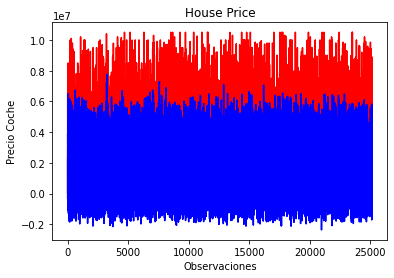

In [41]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [42]:
metricas(y_test, y_pred)

R2 Score: 0.592358600942496
MAE: 885547.5350350218
MSE: 1584337300445.097


### Cross Validation

In [43]:
lasso_cv_media = cross_val_score(lasso, X_train_ss, y_train, cv = 4, n_jobs = -1)
# cross validation score
np.mean(lr_cv_media), np.std(lr_cv_media)

(0.5833714832210424, 0.002291598542248398)

### Hiperparametrización

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# modelo
lasso_cv = Lasso()

# se crea el grid de variables para el modelo lasso
param_grid_lasso = {'alpha': np.linspace(0.0001, 100, 10),
                'fit_intercept': [True, False],
                'warm_start': [True, False],
                'tol': [0.00001, 0.0000001, 0.01],
                'positive': [True, False]}

# Grid Search
lasso_gs = RandomizedSearchCV(lasso_cv, param_grid_lasso, cv=4, error_score=-1000, n_jobs=-1,
                              scoring="r2", verbose=5)
lasso_gs.fit(X_train_ss, y_train)
print("Best score: " + str(lasso_gs.best_score_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best score: 0.583264161240994


In [45]:
lasso_best = lasso_gs.best_estimator_

### Train & Test Score

In [46]:
y_pred_train_best = lasso_best.predict(X_train_ss)
y_pred_test_best = lasso_best.predict(X_test_ss)

In [47]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841014186922967
MAE: 882842.1224537226
MSE: 1569743371389.6697

Test Score
R2 Score: 0.5921594262574097
MAE: 885654.3903906788
MSE: 1585111411915.66


## Ridge

In [48]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha = 0.014)
ridge.fit(X_train_ss,y_train)

Ridge(alpha=0.014)

### Train Score

In [49]:
y_pred_train = ridge.predict(X_train_ss)
metricas(y_train, y_pred_train)

R2 Score: 0.5841014114616894
MAE: 882841.7487822648
MSE: 1569743398680.4524


### Test Score

In [50]:
y_pred = ridge.predict(X_test_ss)

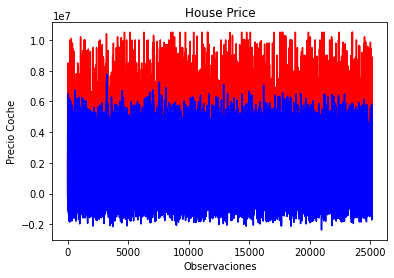

In [51]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [52]:
metricas(y_test, y_pred)

R2 Score: 0.5923590717268183
MAE: 885545.7381301029
MSE: 1584335470696.784


### Cross Validation

In [53]:
ridge_cv_media = cross_val_score(ridge, X_train_ss, y_train, cv = 4, n_jobs = -1)
# cross validation score
np.mean(ridge_cv_media), np.std(ridge_cv_media)

(0.583372769348278, 0.0022957588979110187)

### Hiperparametrización

In [54]:
# modelo
ridge_cv = Ridge()

# se crea el grid de variables para el modelo lasso
param_grid_ridge = {'alpha': np.linspace(0.001, 10.0, 10),
                'fit_intercept': [True, False],
                'tol': [0.00001, 0.0000001, 0.01],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# Grid Search
ridge_gs = RandomizedSearchCV(ridge_cv, param_grid_ridge, cv=4, error_score=-1000, n_jobs=-1,
                              scoring="r2", verbose=5)
ridge_gs.fit(X_train_ss, y_train)
print("Best score: " + str(ridge_gs.best_score_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best score: 0.5833580302778072


In [55]:
ridge_best = ridge_gs.best_estimator_

### Train & Test Score

In [56]:
y_pred_train_best = ridge_best.predict(X_train_ss)
y_pred_test_best = ridge_best.predict(X_test_ss)

In [57]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841014114616894
MAE: 882841.7487822648
MSE: 1569743398680.4524

Test Score
R2 Score: 0.592314029206558
MAE: 885568.054602352
MSE: 1584510532761.4307


## Elastic Net

In [58]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.000001)

elastic.fit(X_train_ss,y_train)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.891720061658434e+16, tolerance: 37949873805014.04
  positive)


ElasticNet(alpha=1e-06)

### Train Score

In [59]:
y_pred_train = elastic.predict(X_train_ss)
metricas(y_train, y_pred_train)

R2 Score: 0.5841013286517951
MAE: 882840.7750821285
MSE: 1569743711233.2922


### Test Score

In [60]:
y_pred = elastic.predict(X_test_ss)

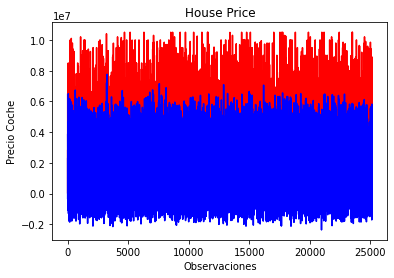

In [61]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [62]:
metricas(y_test, y_pred)

R2 Score: 0.5923601391915818
MAE: 885541.1381025318
MSE: 1584331321892.8455


### Cross Validation

In [63]:
elastic_cv_media = cross_val_score(elastic, X_train_ss, y_train, cv = 4, n_jobs = -1)
# cross validation score
np.mean(elastic_cv_media), np.std(elastic_cv_media)

(0.5833747396973621, 0.002302385307040787)

### Hiperparametrización

In [64]:
# modelo
elastic_cv = ElasticNet()

# se crea el grid de variables para el modelo lasso
param_grid_elastic = {'alpha': np.linspace(0.001, 10.0, 10),
                    'l1_ratio': np.linspace(0.001, 1, 10),
                    'fit_intercept': [True, False],
                    'tol': [0.00001, 0.0000001, 0.01],
                    'warm_start': [True, False]}

# Grid Search
elastic_gs = RandomizedSearchCV(elastic_cv, param_grid_elastic, cv=4, error_score=-1000, n_jobs=-1,
                              scoring="r2", verbose=5)
elastic_gs.fit(X_train_ss, y_train)
print("Best score: " + str(elastic_gs.best_score_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best score: 0.5832509677894775


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.91449611777949e+16, tolerance: 37949873805.01403
  positive)


In [65]:
elastic_best = elastic_gs.best_estimator_

### Train & Test Score

In [66]:
y_pred_train_best = elastic_best.predict(X_train_ss)
y_pred_test_best = elastic_best.predict(X_test_ss)

In [67]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841013286517951
MAE: 882840.7750821285
MSE: 1569743711233.2922

Test Score
R2 Score: 0.5920795393897836
MAE: 885366.3218317628
MSE: 1585421899870.24


## LARS

In [68]:
from sklearn.linear_model import Lars

lars=Lars()
lars.fit(X_train_ss, y_train)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. alpha=7.003e+09, with an active set of 83 regressors, and the smallest cholesky pivot element being 6.144e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


Lars()

### Train Score

In [69]:
metricas(y_train, lars.predict(X_train_ss))

R2 Score: -1.220816628974507e+21
MAE: 5530038172417065.0
MSE: 4.6077791489199266e+33


### Test Score

In [70]:
y_pred = lars.predict(X_test_ss)

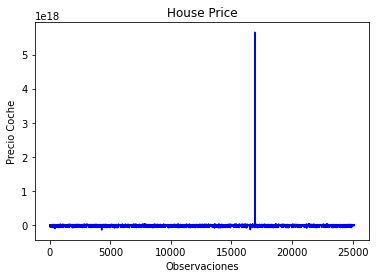

In [71]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [72]:
metricas(y_test, y_pred)

R2 Score: -3.5724103188414307e+20
MAE: 5018066506329358.0
MSE: 1.3884514511336533e+33


### Cross Validation

In [73]:
lars_cv_media = cross_val_score(lars, X_train_ss, y_train, cv = 4, n_jobs = -1)
# cross validation score
np.mean(lars_cv_media), np.std(lars_cv_media)

(-3.504151327485039e+17, 6.000254679046812e+17)

### Hiperparametrización

In [74]:
# modelo
lars_cv = Lars()

# se crea el grid de variables para el modelo lasso
param_grid_lars = {'fit_intercept': [True, False]}

# Grid Search
lars_gs = GridSearchCV(lars_cv, param_grid_lars, cv=4, error_score=-1000, n_jobs=-1,
                          scoring="r2", verbose=5)

lars_gs.fit(X_train_ss, y_train)
print("Best score: " + str(lars_gs.best_score_))

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best score: -3.504151327485039e+17


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. alpha=7.003e+09, with an active set of 83 regressors, and the smallest cholesky pivot element being 6.144e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


In [75]:
lars_best = lars_gs.best_estimator_

### Train & Test Score

In [76]:
y_pred_train_best = lars_best.predict(X_train_ss)
y_pred_test_best = lars_best.predict(X_test_ss)

In [77]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841013286517951
MAE: 882840.7750821285
MSE: 1569743711233.2922

Test Score
R2 Score: -3.5724103188414307e+20
MAE: 5018066506329358.0
MSE: 1.3884514511336533e+33


## Bayesian

In [78]:
from sklearn.linear_model import BayesianRidge

bayes = BayesianRidge()
bayes.fit(X_train_ss, y_train)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BayesianRidge()

### Train Score

In [79]:
metricas(y_train, bayes.predict(X_train_ss))

R2 Score: 0.5839897371097458
MAE: 882750.8451157273
MSE: 1570164895847.3018


### Test Score

In [80]:
y_pred = bayes.predict(X_test_ss)

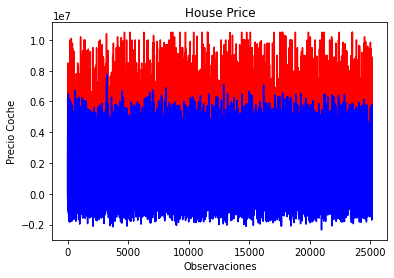

In [81]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [82]:
metricas(y_test, y_pred)

R2 Score: 0.5922114136611781
MAE: 885555.5608142717
MSE: 1584909357896.7744


### Cross Validation

In [83]:
bayes_cv_media = cross_val_score(bayes, X_train_ss, y_train, cv = 4, n_jobs = -1)
# cross validation score
np.mean(bayes_cv_media), np.std(bayes_cv_media)

(0.5833127956660633, 0.0024424491606427705)

### Hiperparametrización

In [84]:
# modelo
bayes_cv = BayesianRidge()

# se crea el grid de variables para el modelo lasso
param_grid_bayes = {'alpha_1': np.linspace(1e-06, 10, 10),
                'tol': [0.00001, 0.0000001, 0.01],
                'alpha_2': np.linspace(1e-06, 10, 10),
                'lambda_1': np.linspace(1e-06, 1, 10),
                'lambda_2': np.linspace(1e-06, 1, 10),    
                'fit_intercept': [True, False]}

# Grid Search
bayes_gs = RandomizedSearchCV(bayes_cv, param_grid_bayes, cv=4, error_score=-1000, n_jobs=-1,
                              scoring="r2", verbose=5)
bayes_gs.fit(X_train_ss, y_train)
print("Best score: " + str(bayes_gs.best_score_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best score: 0.5833127956660633


In [85]:
bayes_best = bayes_gs.best_estimator_

### Train & Test Score

In [86]:
y_pred_train_best = bayes_best.predict(X_train_ss)
y_pred_test_best = bayes_best.predict(X_test_ss)

In [87]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841013286517951
MAE: 882840.7750821285
MSE: 1569743711233.2922

Test Score
R2 Score: 0.5922114136611785
MAE: 885555.5608142719
MSE: 1584909357896.773


## SGDRegressor

In [88]:
from sklearn.linear_model import SGDRegressor

#entrenamiento con sgd 
sgdr = SGDRegressor()
sgdr.fit(X_train_ss, y_train)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

### Train Score

In [89]:
metricas(y_train, sgdr.predict(X_train_ss))

R2 Score: 0.5740978620689358
MAE: 869192.0860098163
MSE: 1607500212613.9587


### Test Score

In [90]:
y_pred = sgdr.predict(X_test_ss)

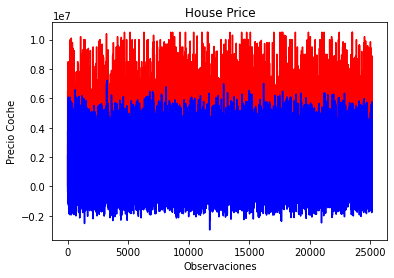

In [91]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [92]:
metricas(y_test, y_pred)

R2 Score: 0.5798868775564562
MAE: 875104.8504028291
MSE: 1632809846675.734


### Cross Validation

In [93]:
sgdr_cv_media = cross_val_score(sgdr, X_train_ss, y_train, cv = 4, n_jobs = -1)
# cross validation score
np.mean(sgdr_cv_media), np.std(sgdr_cv_media)

(0.5684287215627715, 0.016843568212467627)

### Hiperparametrización

In [94]:
# modelo
sgdr_cv = SGDRegressor()

In [95]:
# modelo
sgdr_cv = SGDRegressor()

# se crea el grid de variables para el modelo lasso
param_grid_sgdr = {'loss': ['squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
                'penalty': ['l2', 'l1', 'elasticnet'],
                'alpha': np.linspace(1e-06, 10, 10),
                'l1_ratio': np.linspace(1e-06, 1, 10),
                'tol': [0.00001, 0.0000001, 0.01],    
                'fit_intercept': [True, False]}

# Grid Search
sgdr_gs = RandomizedSearchCV(sgdr_cv, param_grid_sgdr, cv=4, error_score=-1000, n_jobs=-1,
                              scoring="r2", verbose=5)
sgdr_gs.fit(X_train_ss, y_train)
print("Best score: " + str(sgdr_gs.best_score_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best score: 0.5706377146559429


In [96]:
sgdr_best = sgdr_gs.best_estimator_

### Train & Test Score

In [97]:
y_pred_train_best = sgdr_best.predict(X_train_ss)
y_pred_test_best = sgdr_best.predict(X_test_ss)

In [98]:
print('Train Score')
metricas(y_train, y_pred_train)
print('')
print('Test Score')
metricas(y_test, y_pred_test_best)

Train Score
R2 Score: 0.5841013286517951
MAE: 882840.7750821285
MSE: 1569743711233.2922

Test Score
R2 Score: 0.5267001382916241
MAE: 1018333.7820662542
MSE: 1839525197719.935
